# **PROJETO CE2**



## **Definição das Funções**



In [15]:
import cmath
import numpy as np
import sympy as sp

j = complex(0, 1)

def carga(z): # Matriz de carga
  return np.array([[1, 0], [1/z, 1]])

def impedanciaSerie(z): # Matriz de impedância série
  return np.array([[1, z], [0, 1]])

def linhaTransmissao(r_km, l_km, c_km, km, w): # Matriz de linha de transmissão média (80 km - 200 km)
  r = r_km*km
  l = l_km*km
  c = c_km*km
  A = 1 + ((j*w*c)/2)*(r + j*w*l)
  B = r + j*w*l
  C = j*w*c + (((j*w*c)**2)/4)*(r + j*w*l)
  D = 1 + ((j*w*c)/2)*(r + j*w*l)
  return np.array([[A, B], [C, D]])

def transformador(r1, r2, rm, xl1, xl2, xlm, n): # Matriz de transformador de potência
  a = 1 + ((rm + j*xlm)/(rm*j*xlm))*(r1 + j*xl1)
  b = r1 + j*xl1 + r2 + j*xl2 + ((rm + j*xlm)/(rm*j*xlm))*(r1 + j*xl1)*(r2 + j*xl2)
  c = (rm + j*xlm)/(rm*j*xlm)
  d = 1 + ((rm + j*xlm)/(rm*j*xlm))*(r2 + j*xl2)
  m1 = np.array([[a, b], [c, d]])
  m2 = np.array([[1/n, 0], [0,n]])
  return np.dot(m1, m2)
  
def paralelo(m1,m2): # Interconexão de quadripolos em  paralela
    Aa = m1[0][0]
    Ba = m1[0][1]
    Ca = m1[1][0]
    Da = m1[1][1]
    Ab = m2[0][0]
    Bb = m2[0][1]
    Cb = m2[1][0]
    Db = m2[1][1]
    A = (Aa*Bb + Ab*Ba)/(Ba + Bb)
    B = (Ba*Bb)/(Ba + Bb)
    C = Ca + Cb + ((Aa - Ab)*(Db - Da))/(Ba + Bb)
    D = (Bb*Da + Ba*Db)/(Ba + Bb)
    return np.array([[A, B] , [C, D]])

def cascata(m1, m2): # Interconexão de quadripolos em cascata
  return np.dot(m1, m2)

def fasor(z):
    z = complex(z)
    mag_z, fase_z = cmath.polar(z)
    fase_graus = np.rad2deg(fase_z)
    fasor = [mag_z,fase_graus]
    return fasor
def erro_rel(Valor_ref,Valor):
    erro_rel = abs((Valor_ref-Valor)/Valor_ref)*100
    return erro_rel

## **Parâmetros do Sistema**



In [16]:
f = 60
w = 2*np.pi*f

Zf = 2 +(0.38*j)

R_lt = 0.182
L_lt = 2.28e-3
C_lt = 0.0140e-6

L123 = 100
L45 = 80
L6 = 120

R1_t = 7.6e-3
X1_t = 3.8e-3
R2_t = 33.9e-3
X2_t = 0.85e-3    
Rm1_t = 4320
Xm1_t = 5050
Rm2_t = 432e3
Xm2_t = 505e3
Rm3_t = 402e3
Xm3_t = 607e3    
n1 = 10/3
n2 = 0.6
n3  = 0.5

S1 = (11.9680e6) + (24.7076e6)*j
S2 = (30.8442e6) + (63.6053e6)*j
S3 = (17.0740e6) + (35.2865e6)*j

V_nominal = np.array([230e3,138e3,69e3])

z1 = (V_nominal[0]**2)/(S1.conjugate())
z2 = (V_nominal[1]**2)/(S2.conjugate())
z3 = (V_nominal[2]**2)/(S3.conjugate())

print("-"*100)
print("Cálculo das Impedâncias por meio das Tensões e Potências Nominais")
print("-"*100)
print(f"Z1 = ({z1:.3f}) Ω\nZ2 = ({z2:.3f}) Ω\nZ3 = ({z3:.3f}) Ω")
print("-"*100)

----------------------------------------------------------------------------------------------------
Cálculo das Impedâncias por meio das Tensões e Potências Nominais
----------------------------------------------------------------------------------------------------
Z1 = (840.001+1734.158j) Ω
Z2 = (117.550+242.405j) Ω
Z3 = (52.900+109.327j) Ω
----------------------------------------------------------------------------------------------------


## <b>Modelagem do Sistema</b>

In [17]:
#Instanciação das Matrizes de Transmissão de cada elemento

##Matriz da Impedância Série de Thévenin
Zth = impedanciaSerie(Zf)

##Matrizes das Linhas de Transmissão
LT1 = LT2 = LT3 = linhaTransmissao(R_lt, L_lt, C_lt, L123, w)
LT4 = LT5 = linhaTransmissao(R_lt, L_lt, C_lt, L45, w)
LT6 = linhaTransmissao(R_lt, L_lt, C_lt, L6, w)

##Matrizes dos Transformadores
T1 = transformador(R1_t, R2_t, Rm1_t, X1_t, X2_t, Xm1_t, n1)
T2 = transformador(R1_t, R2_t, Rm2_t, X1_t, X2_t, Xm2_t, n2)
T3 = transformador(R1_t, R2_t, Rm3_t, X1_t, X2_t, Xm3_t, n3)

##Matrizes das Cargas
Z1 = carga(z1)
Z2 = carga(z2)
Z3 = carga(z3)

## <b>Associação entre as Matrizes</b>



In [18]:
# Associação entre a fonte até a linha LT3
m1 = cascata(Zth, T1)
m2 = paralelo(LT1, LT2)
m3 = paralelo(m2, LT3)  
m4 = cascata(m1, m3) # cascata até o transformador 1

# Associação entre Z1 e T2
m5 = cascata(m4, Z1)
m6 = paralelo(LT4, LT5)
m7 = cascata(m5, m6)
m8 = cascata(m7, T2) # cascata até o transformador 2

# Associação entre T2 e T3 
m9 = cascata(m8, Z2)
m10 = cascata(m9, LT6)
m11 = cascata(m10,T3) # cascata até o transformador 3

# Associção entre T3 ao Gnd
T_equivalente = m11 


## <b> Determinação da Tensão de Saída e Corrente em Z3 



In [19]:
# Tensão  do Gerador
V_in = 69e3

#Variáveis do Sistema
I_inSym = sp.symbols("I_inSym")
V_Z3Sym = sp.symbols("V_Z3Sym")
I_Z3Sym = (V_Z3Sym/z3)

#Sistema de equações 
T_eq = sp.Matrix(T_equivalente)
Out =  sp.Matrix([V_Z3Sym, I_Z3Sym])
In = sp.Matrix([V_in, I_inSym])

sistema = sp.Eq(T_eq*Out, In)

sol = sp.solve(sistema, (I_inSym,V_Z3Sym))
I_in = complex(sol[I_inSym])
V_Z3 = complex(sol[V_Z3Sym])
I_Z3 = complex(V_Z3/z3)

VR_Z3 = ((z3.real)*(I_Z3))
VXl_Z3 = ((z3.imag*j)*(I_Z3))
I_inFasor = fasor(I_in)
V_Z3Fasor = fasor(V_Z3)
I_Z3Fasor = fasor(I_Z3)
VR_Z3Fasor = fasor(VR_Z3)
VXl_Z3Fasor = fasor(VXl_Z3)

print("-"*100)
print("Corrente de Entrada do Sistema")
print("-"*100)
print(f"I_in = {I_inFasor[0]:.3f} A ∠ {I_inFasor[1]:.3f}° ")
print("-"*100)
print("Tensão e Corrente na carga Z3")
print("-"*100)
print(f"V_Z3 = {V_Z3Fasor[0]/1e3:.3f} kV ∠ {V_Z3Fasor[1]:.3f}° ")
# print(f"Parte Real V_Z3: VR_Z3 = {VR_Z3Fasor[0]:.5f} V ∠ {VR_Z3Fasor[1]:.3f}° ")
# print(f"Parte Imaginária V_Z3: VXL_Z3 = {VXl_Z3Fasor[0]:.5f} V ∠ {VXl_Z3Fasor[1]:.3f}° ")
print(f"I_Z3 = {I_Z3Fasor[0]:.5f} A ∠ {I_Z3Fasor[1]:.5f}° ")
print("-"*100)



----------------------------------------------------------------------------------------------------
Corrente de Entrada do Sistema
----------------------------------------------------------------------------------------------------
I_in = 803.586 A ∠ 20.404° 
----------------------------------------------------------------------------------------------------
Tensão e Corrente na carga Z3
----------------------------------------------------------------------------------------------------
V_Z3 = 53.851 kV ∠ -6.208° 
I_Z3 = 443.38530 A ∠ -70.38736° 
----------------------------------------------------------------------------------------------------


## **Plotagem do Diagrama Fasorial na Forma Poligonal**



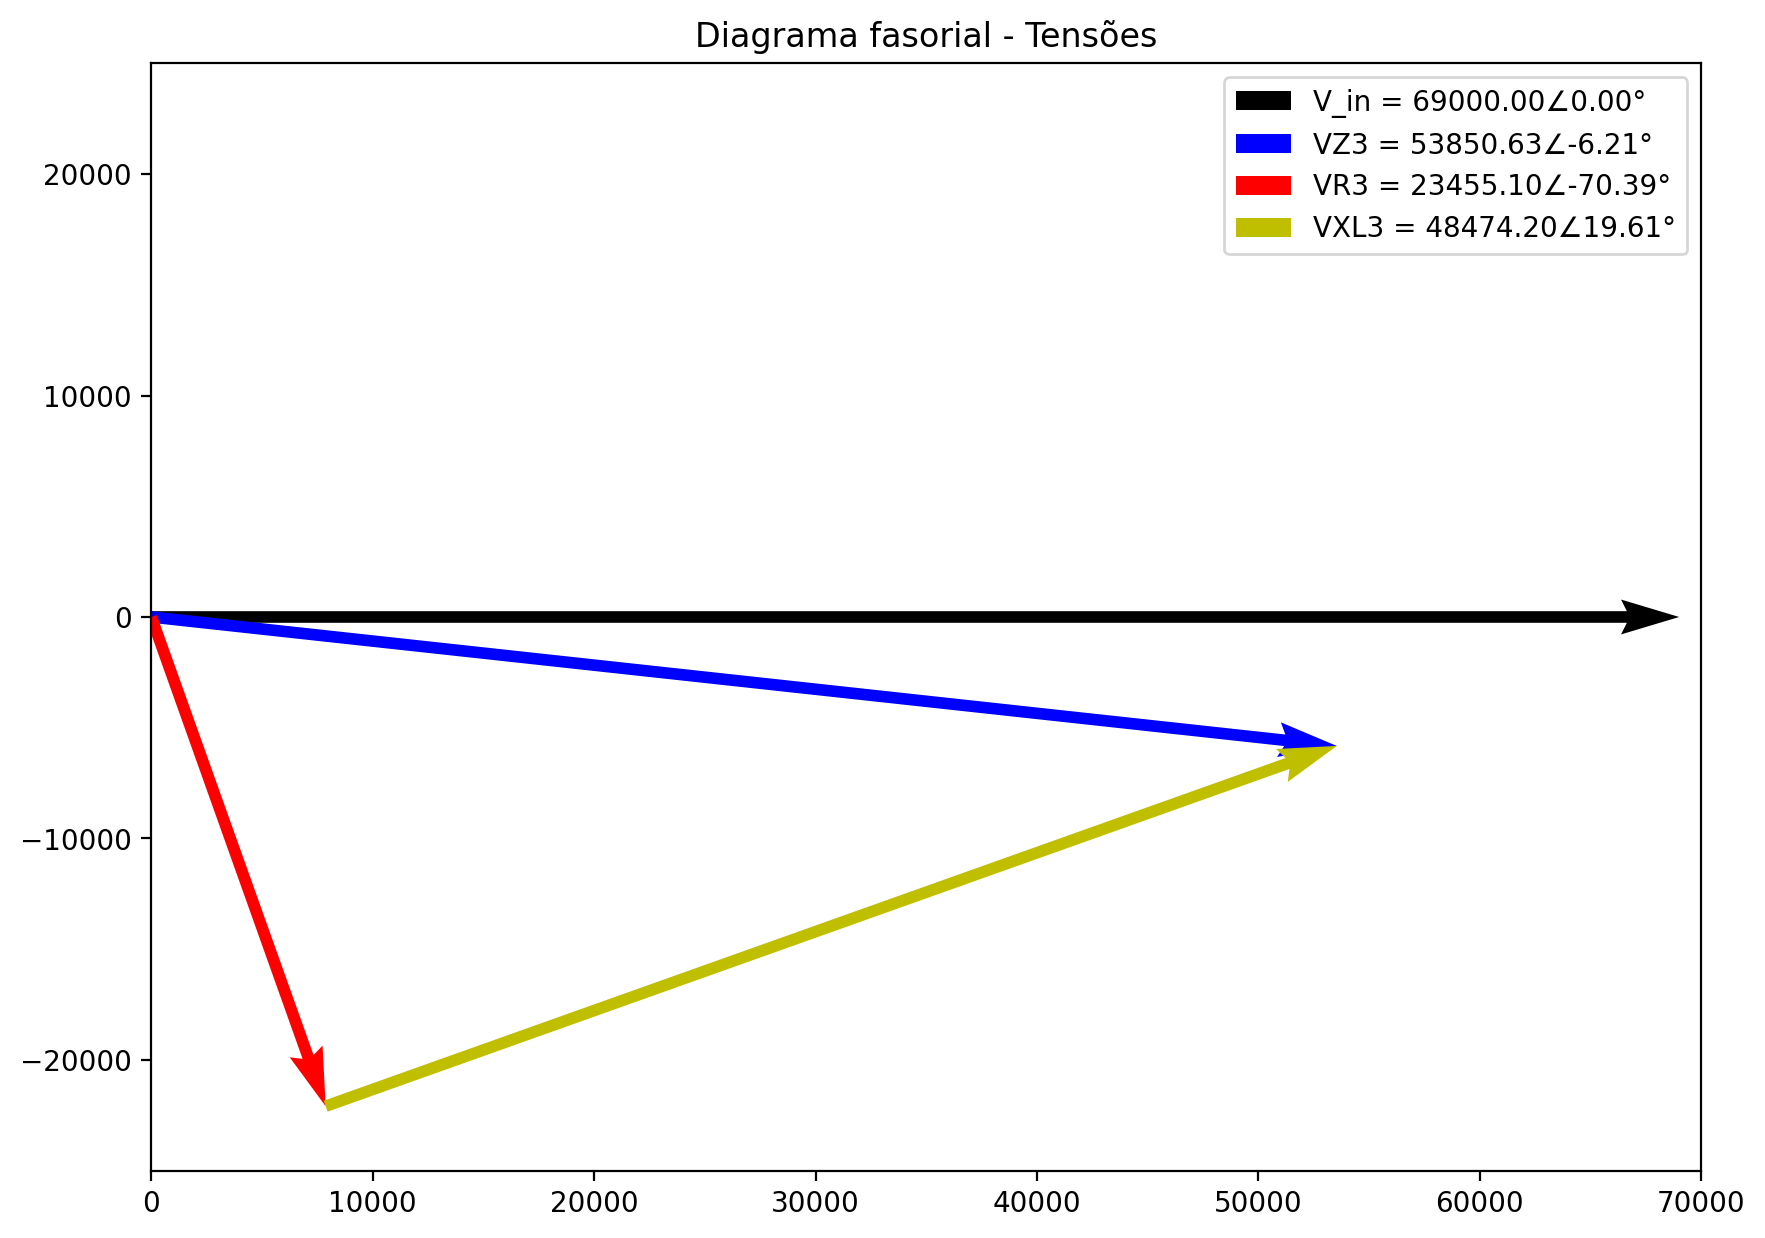

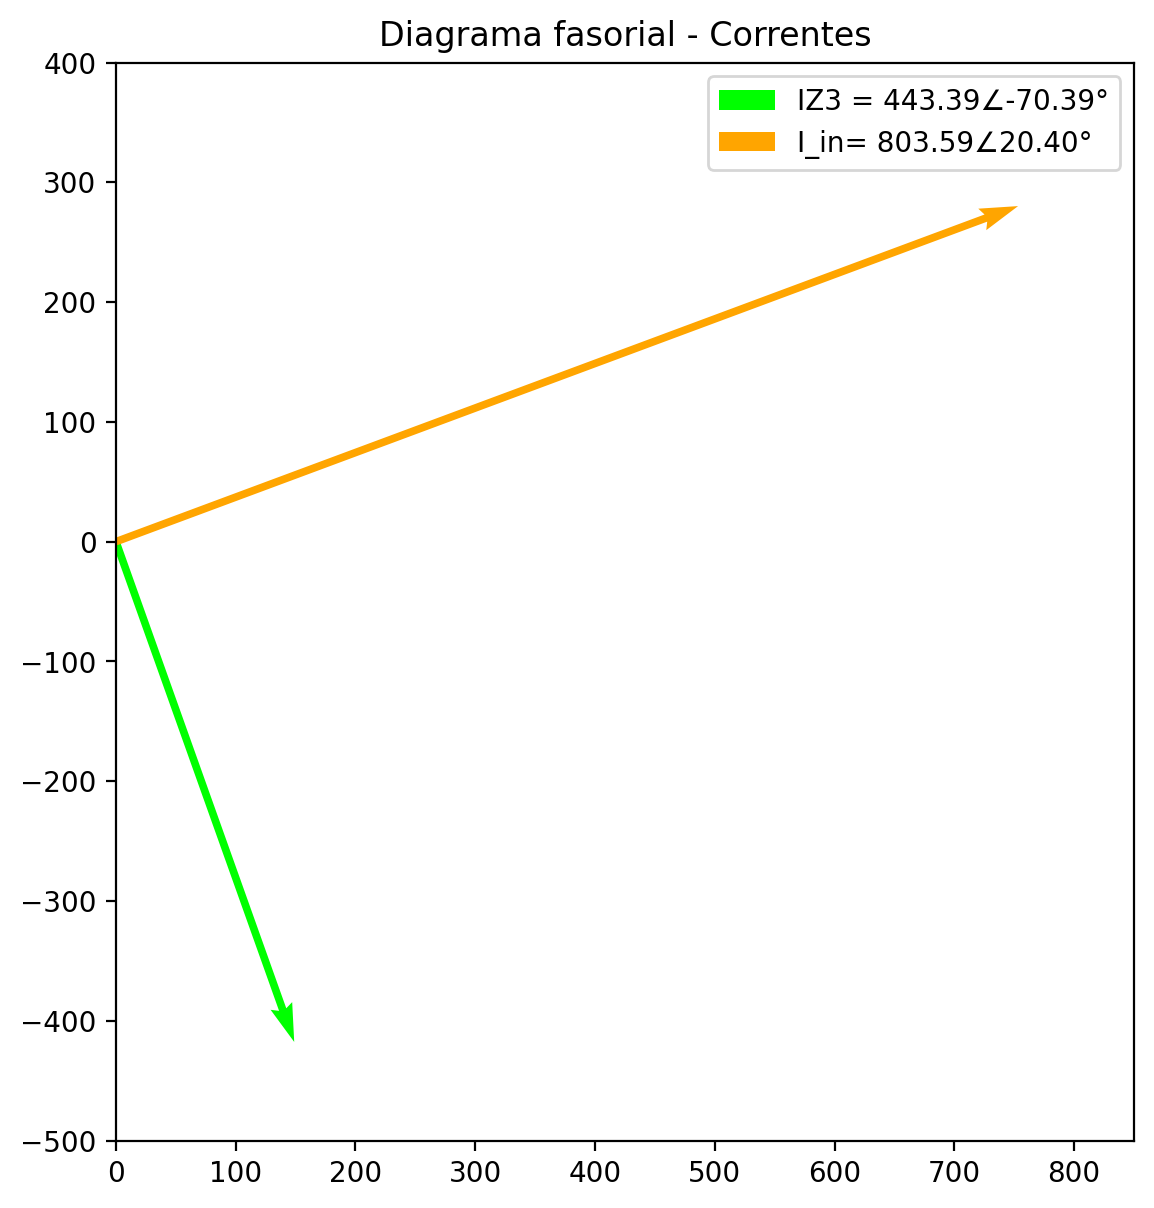

In [20]:
import matplotlib.pyplot as plt
import math


def vetor(modulo, angulo):
    rad = math.radians(angulo)
    return np.array([modulo*math.cos(rad), modulo*math.sin(rad)])


# --- magnitude e ângulo Vin ---
modulo0 = V_in
angulo0 = 0

# --- magnitudes e ângulos Z3  ---
modulo1 = V_Z3Fasor[0]
angulo1 = V_Z3Fasor[1]
modulo2 = VR_Z3Fasor[0]
angulo2 = VR_Z3Fasor[1]
modulo3 = VXl_Z3Fasor[0]
angulo3 = VXl_Z3Fasor[1]
modulo4 = I_Z3Fasor[0]
angulo4 = I_Z3Fasor[1]
modulo5 = I_inFasor[0]
angulo5 = I_inFasor[1]
# --- vetores (em relação à origem) ---
fasor0 = vetor(modulo0, angulo0)  # V_in
fasor1 = vetor(modulo1, angulo1)  # VZ3
fasor2 = vetor(modulo2, angulo2)  # VR3
fasor3 = vetor(modulo3, angulo3)  # VXL_3
fasor4 = vetor(modulo4, angulo4)  # I_Z3
fasor5 = vetor(modulo5, angulo5)  # I_in

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1. set_title("Diagrama fasorial - Tensões")

# V_in (Preto) — origem na (0,0)
ax1.quiver(0, 0, fasor0[0], fasor0[1], angles='xy', scale_units='xy', scale=1,color='k', label=f'V_in = {modulo0:.2f}∠{angulo0:.2f}°')

# VZ3 (Azul) — origem também (0,0)
ax1.quiver(0, 0, fasor1[0], fasor1[1], angles='xy', scale_units='xy', scale=1,color='b', label=f'VZ3 = {modulo1:.2f}∠{angulo1:.2f}°')

# VR3 (Vermelho) — origem também (0,0)
ax1.quiver(0, 0, fasor2[0], fasor2[1], angles='xy', scale_units='xy', scale=1,color='r', label=f'VR3 = {modulo2:.2f}∠{angulo2:.2f}°')

# VXL3 (Amarelo) 
ax1.quiver(fasor2[0], fasor2[1], fasor3[0], fasor3[1], angles='xy', scale_units='xy', scale=1,color='y', label=f'VXL3 = {modulo3:.2f}∠{angulo3:.2f}°')
x = fasor2[0]+fasor3[0]
y = fasor2[1]+fasor3[1]

# Ajustes de visual
ax1.set_xlim([0, 70000])
ax1.set_ylim([-25000, 25000])
ax1.set_aspect('equal')
ax1.legend(loc='best')


fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2. set_title("Diagrama fasorial - Correntes")

# IZ3 (Limão) 
ax2.quiver(0, 0, fasor4[0], fasor4[1], angles='xy', scale_units='xy', scale=1,color='lime', label=f'IZ3 = {modulo4:.2f}∠{angulo4:.2f}°')

# Iin (Laranja)
ax2.quiver(0, 0, fasor5[0], fasor5[1], angles='xy', scale_units='xy', scale=1,color='orange', label=f'I_in= {modulo5:.2f}∠{angulo5:.2f}°')

# Ajustes de visual
ax2.set_xlim([0, 850])
ax2.set_ylim([-500, 400])
ax2.set_aspect('equal')
ax2.legend(loc='best')
plt.show()


## **Tensão e corrente em Z1 e Z2**



In [21]:
#Corrente e Tensão em Z1

##Variáveis do Sistema
V_Z1Sym = sp.symbols("V_Z1Sym")
I_1Sym = sp.symbols("I_1Sym")

##Sistema de equações 
T_eq = sp.Matrix(m4)
Out =  sp.Matrix([V_Z1Sym,I_1Sym])
In = sp.Matrix([V_in,I_in])

sistema = sp.Eq(T_eq*Out, In)

sol = sp.solve(sistema, [V_Z1Sym,I_1Sym])

V_Z1 = complex(sol[V_Z1Sym])
I_Z1 = complex(V_Z1/z1)
  
mag_I_in1, fase_I_in1 = cmath.polar(I_in)
fase_I_in1 = np.rad2deg(fase_I_in1)

mag_V_Z1, fase_V_Z1 = cmath.polar(V_Z1)
fase_V_Z1 = np.rad2deg(fase_V_Z1)
mag_I_Z1, fase_I_Z1 = cmath.polar(I_Z1)
fase_I_Z1 = np.rad2deg(fase_I_Z1)

print("-"*100)
print("Tensão e Corrente da carga Z1")
print("-"*100)
print(f"V_Z1 = {mag_V_Z1/1e3:.5f} kV ∠ {fase_V_Z1:.3f}° ")
print(f"I_Z1 = {mag_I_Z1:.14f} A ∠ {fase_I_Z1:.14f}°")
print("-"*100)

----------------------------------------------------------------------------------------------------
Tensão e Corrente da carga Z1
----------------------------------------------------------------------------------------------------
V_Z1 = 221.48985 kV ∠ -2.226° 
I_Z1 = 114.94682493524682 A ∠ -66.38089401866675°
----------------------------------------------------------------------------------------------------


In [22]:
##Corrente e tensão em Z2

#Variáveis do Sistema
V_Z2Sym = sp.symbols("V_Z2Sym")
I_2Sym = sp.symbols("I_2Sym")

#Sistema de equações 
T_eq = sp.Matrix(m8)
Out =  sp.Matrix([V_Z2Sym,I_2Sym])
In = sp.Matrix([V_in,I_in])

sistema = sp.Eq(T_eq*Out, In)

sol = sp.solve(sistema, [V_Z2Sym, I_2Sym])

V_Z2 = complex(sol[V_Z2Sym])
I_Z2 = V_Z2/z2

mag_I_in, fase_I_in = cmath.polar(I_in)
fase_I_in = np.rad2deg(fase_I_in)

mag_V_Z2, fase_V_Z2 = cmath.polar(V_Z2)
fase_V_Z2 = np.rad2deg(fase_V_Z2)
I_Z2 = complex(V_Z2/z2)
mag_I_Z2, fase_I_Z2 = cmath.polar(I_Z2)
fase_I_Z2 = np.rad2deg(fase_I_Z2)

print("-"*100)
print("Tensão e Corrente da carga Z2")
print("-"*100)
print(f"V_Z2 = {mag_V_Z2/1e3:.5f} kV ∠ {fase_V_Z2:.3f}° ")
print(f"I_Z2 = {mag_I_Z2:.14f} A ∠ {fase_I_Z2:.14f}°")
print("-"*100)

----------------------------------------------------------------------------------------------------
Tensão e Corrente da carga Z2
----------------------------------------------------------------------------------------------------
V_Z2 = 127.06411 kV ∠ -3.338° 
I_Z1 = 471.64947126729243 A ∠ -67.46786938526300°
----------------------------------------------------------------------------------------------------


## **Potência Fornecida pelo Gerador**



In [23]:
#Cálculo da Potência Complexa

S_g = -V_in*(I_in.conjugate())

P_g = S_g.real
Q_g = S_g.imag
print("-"*100)
print("Potência Ativa e Reativa fornecida pelo Gerador")
print("-"*100)
print(f"P: {P_g/1e6:.3f} MW\nQ: {Q_g/1e6:.3f} MVAR")
print("-"*100)

----------------------------------------------------------------------------------------------------
Potência Ativa e Reativa fornecida pelo Gerador
----------------------------------------------------------------------------------------------------
P: -51.969 MW
Q: 19.331 MVAR
----------------------------------------------------------------------------------------------------


## **Potência Consumida pelas Cargas**

In [24]:
##Cálculo da potência consumida pela carga 1 

S_Z1 = complex(V_Z1*(I_Z1.conjugate()))

P_Z1 = S_Z1.real
Q_Z1 = S_Z1.imag

print("-"*100)
print("Potência Ativa e Reativa Consumida pela carga Z1")
print("-"*100)
print(f"P_Z1: {P_Z1/1e6:.3f} MW\nQ_Z1: {Q_Z1/1e6:.3f} MVAR")
print("-"*100)

##Cálculo da potencia consumida pela carga 2 

S_Z2 = complex(V_Z2*(I_Z2.conjugate()))

P_Z2 = S_Z2.real
Q_Z2 = S_Z2.imag

print("Potência Ativa e Reativa Consumida pela carga Z2")
print("-"*100)
print(f"P_Z2: {P_Z2/1e6:.3f} MW\nQ_Z2: {Q_Z2/1e6:.3f} MVAR")
print("-"*100)

##Cálculo da potencia consumida pela carga 3

S_Z3 = complex(V_Z3*(I_Z3.conjugate()))
P_Z3 = S_Z3.real
Q_Z3 = S_Z3.imag

print("Potência Ativa e Reativa Consumida pela carga Z3")
print("-"*100)
print(f"P_Z3: {P_Z3/1e6:.3f} MW\nQ_Z3: {Q_Z3/1e6:.3f} MVAR")
print("-"*100)

----------------------------------------------------------------------------------------------------
Potência Ativa e Reativa Consumida pela carga Z1
----------------------------------------------------------------------------------------------------
P_Z1: 11.099 MW
Q_Z1: 22.913 MVAR
----------------------------------------------------------------------------------------------------
Potência Ativa e Reativa Consumida pela carga Z2
----------------------------------------------------------------------------------------------------
P_Z2: 26.149 MW
Q_Z2: 53.924 MVAR
----------------------------------------------------------------------------------------------------
Potência Ativa e Reativa Consumida pela carga Z3
----------------------------------------------------------------------------------------------------
P_Z3: 10.400 MW
Q_Z3: 21.493 MVAR
----------------------------------------------------------------------------------------------------


## **Perda de Potência**

In [25]:
#Potência Complexa Perdida

S_TotalCargas = complex(S_Z1+S_Z2+S_Z3)

P_Perdida = abs(S_g.real)-abs(S_TotalCargas.real)
Q_Perdida = abs(abs(S_g.imag)-abs(S_TotalCargas.imag))


P_perG = abs(P_Perdida/S_g.real)*100
Q_perG = abs(Q_Perdida/S_g.imag)*100

print("-"*100)
print("Potência Ativa e Reativa Perdida no Sistema")
print("-"*100)
print(f"P_Perdida: {P_Perdida/1e6:.3f} MW ({P_perG:.2f}%)\nQ_Perdida: {Q_Perdida/1e6:.3f} MVAR ({Q_perG:.3f}%)")
print("-"*100)

----------------------------------------------------------------------------------------------------
Potência Ativa e Reativa Perdida no Sistema
----------------------------------------------------------------------------------------------------
P_Perdida: 4.321 MW (8.31%)
Q_Perdida: 78.999 MVAR (408.667%)
----------------------------------------------------------------------------------------------------


## **Novos valores de impedâncias**



In [31]:
import scipy.optimize as opt

def simularSistema(Z):
 
    z1_Sim = Z[0]
    z2_Sim = Z[1]
    z3_Sim = Z[2]

    Z1_Sim = carga(z1_Sim)
    Z2_Sim = carga(z2_Sim)
    Z3_Sim = carga(z3_Sim)
    
    # Quadripolo Equivalente até Z1
    M1 = cascata(Zth, T1)
    M2 = paralelo(LT1, LT2)
    M3 = paralelo(M2, LT3)  
    M4 = cascata(M1, M3)
    
    # Quadripolo Equivalente até Z2
    M5 = cascata(M4, Z1_Sim)
    M6 = paralelo(LT4, LT5)
    M7 = cascata(M5, M6)
    M8 = cascata(M7, T2)
   
    # Quadripolo Equivalente até Z3
    M9 = cascata(M8, Z2_Sim)
    M10 = cascata(M9, LT6)
    M11 = cascata(M10, T3)

    # Tensão do Gerador
    V_in_Sim = 69e3

    # Variáveis do Sistema
    I_inSym_Sim = sp.symbols("I_inSym_Sim")
    V_Z1Sym_Sim = sp.symbols("V_Z1Sym_Sim")
    V_Z2Sym_Sim = sp.symbols("V_Z2Sym_Sim")
    V_Z3Sym_Sim = sp.symbols("V_Z3Sym_Sim")

    I_1Sym_Sim = sp.symbols("I_1Sym_Sim")
    I_2Sym_Sim = sp.symbols("I_2Sym_Sim")
    I_Z3Sym_Sim =  V_Z3Sym_Sim/z3_Sim

    # Matrizes de Entrada e Saídas
    In_Sim_Z3 = sp.Matrix([V_in_Sim, I_inSym_Sim])
    Out_Sim1 = sp.Matrix([V_Z1Sym_Sim, I_1Sym_Sim])
    Out_Sim2 = sp.Matrix([V_Z2Sym_Sim, I_2Sym_Sim])
    Out_Sim3 = sp.Matrix([V_Z3Sym_Sim, I_Z3Sym_Sim])

    # Matrizes de Transmissão Equivalente
    T_eq_Sim1 = sp.Matrix(M4)
    T_eq_Sim2 = sp.Matrix(M8)
    T_eq_Sim3 = sp.Matrix(M11)

    # Sistemas (Z3)
    sistema_Sim3 = sp.Eq(T_eq_Sim3 * Out_Sim3, In_Sim_Z3)


    # Solução dos Sistemas (Z3)
    sol_Sim3 = sp.solve(sistema_Sim3, (V_Z3Sym_Sim, I_inSym_Sim))
    
    #Corrente de Entrada do Sistema
    I_in_Sim = complex(sol_Sim3[I_inSym_Sim])
    #Sistemas
    In_Sim_Z12 = sp.Matrix([V_in_Sim,I_in_Sim])
    sistema_Sim1 = sp.Eq(T_eq_Sim1*Out_Sim1,In_Sim_Z12)
    sistema_Sim2 = sp.Eq(T_eq_Sim2*Out_Sim2,In_Sim_Z12)
    sol_Sim1 = sp.solve(sistema_Sim1, (V_Z1Sym_Sim,I_1Sym_Sim))
    sol_Sim2 = sp.solve(sistema_Sim2, (V_Z2Sym_Sim,I_2Sym_Sim))

   

    # Tensões e Correntes Resultantes
    V_ZSim = np.array([
        complex(sol_Sim1[V_Z1Sym_Sim]),
        complex(sol_Sim2[V_Z2Sym_Sim]),
        complex(sol_Sim3[V_Z3Sym_Sim])
    ])
    
    I_ZSim = np.array([
        complex(V_ZSim[0]/z1_Sim),
        complex(V_ZSim[1]/z2_Sim),
        complex(V_ZSim[2]/z3_Sim)
    ])
    

    # Potência Complexa das Cargas
    S_ZSim = np.array([
        (V_ZSim[0] * np.conjugate(I_ZSim[0])),
        (V_ZSim[1] * np.conjugate(I_ZSim[1])),
        (V_ZSim[2] * np.conjugate(I_ZSim[2]))
    ])

    # Potência Complexa do Gerador
    S_gSim = V_in_Sim * np.conjugate(I_in_Sim)

    # Perda de Potências 
    S_ZTotalSim = np.sum(S_ZSim)
    P_PerdidaSim = abs((abs(S_gSim.real) - abs(S_ZTotalSim.real))/abs(S_gSim.real))*100
    Q_PerdidaSim = abs((abs(S_gSim.imag) - abs(S_ZTotalSim.imag))/abs(S_gSim.imag))*100

    resultadoSim = {
        'V_Z1': V_ZSim[0], 'I_Z1': I_ZSim[0],
        'V_Z2': V_ZSim[1], 'I_Z2': I_ZSim[1],
        'V_Z3': V_ZSim[2], 'I_Z3': I_ZSim[2],
        'S_g': S_gSim, 'I_in_Sim': I_in_Sim,
        'P_g': abs(S_gSim.real), 'Q_g': abs(S_gSim.imag), 
        'P_ZTotal': abs(S_ZTotalSim.real), 'Q_ZTotal': abs(S_ZTotalSim.imag),
        'P_Perdida': P_PerdidaSim, 'Q_Perdida': Q_PerdidaSim
    }

    return resultadoSim


z_new = np.array([863.039+1751.831j,294.195+294.897j,137.242+64.969j])

Sim = simularSistema(z_new)

print("-"*100)
print("Impedâncias Determinadas para Correção na Perda de Potência")
print("-"*100)
print(f"Z1 = {z_new[0]:.3f} Ω\nZ2 = {z_new[1]:.3f} Ω\nZ3 = {z_new[2]:.3f} Ω")
print("-"*100)
print("Potência Perdida")
print("-"*100)
print(f"P: {Sim['P_Perdida']:.3f}%\nQ: {Sim['Q_Perdida']:.3f}%")
print("-"*100)Lo

----------------------------------------------------------------------------------------------------
Impedâncias Determinadas para Correção na Perda de Potência
----------------------------------------------------------------------------------------------------
Z1 = 863.039+1751.831j Ω
Z2 = 294.195+294.897j Ω
Z3 = 137.242+64.969j Ω
----------------------------------------------------------------------------------------------------
Potência Perdida
----------------------------------------------------------------------------------------------------
P: 9.361%
Q: 9.361%
----------------------------------------------------------------------------------------------------


## **Ajuste no TAP dos transformadores**



In [27]:
def simularSistema_newTap(Tap):
    
    T1_newTap = transformador(R1_t, R2_t, Rm1_t, X1_t, X2_t, Xm1_t,Tap[0])
    T2_newTap = transformador(R1_t, R2_t, Rm2_t, X1_t, X2_t, Xm2_t,Tap[1])
    T3_newTap = transformador(R1_t, R2_t, Rm3_t, X1_t, X2_t, Xm3_t,Tap[2])

    Z1_Sim = Z1
    Z2_Sim = Z2
    Z3_Sim = Z3
    
    # Quadripolo Equivalente até Z1
    M1 = cascata(Zth, T1_newTap)
    M2 = paralelo(LT1, LT2)
    M3 = paralelo(M2, LT3)  
    M4 = cascata(M1, M3)
    
    # Quadripolo Equivalente até Z2
    M5 = cascata(M4, Z1_Sim)
    M6 = paralelo(LT4, LT5)
    M7 = cascata(M5, M6)
    M8 = cascata(M7, T2_newTap)
   
    # Quadripolo Equivalente até Z3
    M9 = cascata(M8, Z2_Sim)
    M10 = cascata(M9, LT6)
    M11 = cascata(M10, T3_newTap)

    # Tensão do Gerador
    V_in_Sim = 69e3

    # Variáveis do Sistema
    I_inSym_Sim = sp.symbols("I_inSym_Sim")
    V_Z1Sym_Sim = sp.symbols("V_Z1Sym_Sim")
    V_Z2Sym_Sim = sp.symbols("V_Z2Sym_Sim")
    V_Z3Sym_Sim = sp.symbols("V_Z3Sym_Sim")

    I_1Sym_Sim = sp.symbols("I_1Sym_Sim")
    I_2Sym_Sim = sp.symbols("I_2Sym_Sim")
    I_Z3Sym_Sim = V_Z3Sym_Sim/z3

    # Matrizes de Entrada e Saídas
    In_Sim_Z3 = sp.Matrix([V_in_Sim, I_inSym_Sim])
    Out_Sim1 = sp.Matrix([V_Z1Sym_Sim, I_1Sym_Sim])
    Out_Sim2 = sp.Matrix([V_Z2Sym_Sim, I_2Sym_Sim])
    Out_Sim3 = sp.Matrix([V_Z3Sym_Sim, I_Z3Sym_Sim])

    # Matrizes de Transmissão Equivalente
    T_eq_Sim1 = sp.Matrix(M4)
    T_eq_Sim2 = sp.Matrix(M8)
    T_eq_Sim3 = sp.Matrix(M11)

    # Sistemas (Z3)
    sistema_Sim3 = sp.Eq(T_eq_Sim3 * Out_Sim3, In_Sim_Z3)


    # Solução dos Sistemas (Z3)
    sol_Sim3 = sp.solve(sistema_Sim3, (V_Z3Sym_Sim, I_inSym_Sim))
    
    #Corrente de Entrada do Sistema
    I_in_Sim = complex(sol_Sim3[I_inSym_Sim])
    #Sistemas
    In_Sim_Z12 = sp.Matrix([V_in_Sim,I_in_Sim])
    sistema_Sim1 = sp.Eq(T_eq_Sim1*Out_Sim1,In_Sim_Z12)
    sistema_Sim2 = sp.Eq(T_eq_Sim2*Out_Sim2,In_Sim_Z12)
    sol_Sim1 = sp.solve(sistema_Sim1, (V_Z1Sym_Sim,I_1Sym_Sim))
    sol_Sim2 = sp.solve(sistema_Sim2, (V_Z2Sym_Sim,I_2Sym_Sim))
   

    # Tensões e Correntes Resultantes
    V_ZSim = np.array([
        complex(sol_Sim1[V_Z1Sym_Sim]),
        complex(sol_Sim2[V_Z2Sym_Sim]),
        complex(sol_Sim3[V_Z3Sym_Sim])
    ])
    
    I_ZSim = np.array([
        complex(V_ZSim[0]/z1),
        complex(V_ZSim[1]/z2),
        complex(V_ZSim[2]/z3)
    ])
    

    # Potência Complexa das Cargas
    S_ZSim = np.array([
        (V_ZSim[0] * np.conjugate(I_ZSim[0])),
        (V_ZSim[1] * np.conjugate(I_ZSim[1])),
        (V_ZSim[2] * np.conjugate(I_ZSim[2]))
    ])

    # Potência Complexa do Gerador
    S_gSim = V_in_Sim * np.conjugate(I_in_Sim)

    # Perda de Potências (usar valores absolutos)
    S_ZTotalSim = np.sum(S_ZSim)
    P_PerdidaSim = (abs(S_gSim.real) - abs(S_ZTotalSim.real))/abs(S_gSim.real)
    Q_PerdidaSim = (abs(S_gSim.imag) - abs(S_ZTotalSim.imag))/abs(S_gSim.imag)

    resultadoSim = {
        'V_Z1': V_ZSim[0], 'I_Z1': I_ZSim[0],
        'V_Z2': V_ZSim[1], 'I_Z2': I_ZSim[1],
        'V_Z3': V_ZSim[2], 'I_Z3': I_ZSim[2],
        'S_g': S_gSim, 'I_in_Sim': I_in_Sim,
        'P_g': abs(S_gSim.real), 'Q_g': abs(S_gSim.imag),  # Usar valores absolutos
        'P_ZTotal': abs(S_ZTotalSim.real), 'Q_ZTotal': abs(S_ZTotalSim.imag),
        'P_Perdida': P_PerdidaSim, 'Q_Perdida': Q_PerdidaSim
    }

    return resultadoSim


new_Tap = np.array([3.5546, 0.64297, 0.6788])
Sim_newTap = simularSistema_newTap(new_Tap)

V_Z1_newTapCalc = abs(Sim_newTap['V_Z1'])
V_Z2_newTapCalc = abs(Sim_newTap['V_Z2'])
V_Z3_newTapCalc = abs(Sim_newTap['V_Z3'])
erros = np.array([erro_rel(V_nominal[0],V_Z1_newTapCalc),erro_rel(V_nominal[1],V_Z2_newTapCalc),erro_rel(V_nominal[2],V_Z3_newTapCalc)])

print("-"*100)
print("Novas Relações de Transformação")
print("-"*100)
print(f"n1: {new_Tap[0]}\nn2: {new_Tap[1]}\nn3: {new_Tap[2]}")
print("-"*100)
print("Tensões Simuladas")
print("-"*100)
print(f"V_Z1 = {V_Z1_newTapCalc/1e3:.3f} kV ({erros[0]:.3f}%)\nV_Z2 = {V_Z2_newTapCalc/1e3:.3f} kV ({erros[1]:.3f}%)\nV_Z1 = {V_Z3_newTapCalc/1e3:.3f} kV ({erros[2]:.3f}%)")
print("-"*100)

----------------------------------------------------------------------------------------------------
Novas Relações de Transformação
----------------------------------------------------------------------------------------------------
n1: 3.5546
n2: 0.64297
n3: 0.6788
----------------------------------------------------------------------------------------------------
Tensões Simuladas
----------------------------------------------------------------------------------------------------
V_Z1 = 229.751 kV (0.108%)
V_Z2 = 137.994 kV (0.004%)
V_Z1 = 68.882 kV (0.171%)
----------------------------------------------------------------------------------------------------


## **Banco de Capacitores**



In [29]:
C = np.array([6.11787478e-07, 5.24790523e-06, 1.91926849e-05])
z1_new = (z1*(1/(w*C[0]*j)))/((z1+(1/(w*C[0]*j))))
z2_new = (z2*(1/(w*C[1]*j)))/((z2+(1/(w*C[1]*j))))
z3_new = (z3*(1/(w*C[2]*j)))/((z3+(1/(w*C[2]*j))))
    
z_new = np.array([z1_new,z2_new,z3_new])
simulCalc = simularSistema(z_new)
erro_relativo = [erro_rel(V_nominal[0],abs(simulCalc['V_Z1'])),erro_rel(V_nominal[1],abs(simulCalc['V_Z2'])),erro_rel(V_nominal[2],abs(simulCalc['V_Z3']))]

print("-"*100)
print("Valores de Capacitores Determinados")
print("-"*100)
print(f"C1 = {C[0]*1e6:.3f} μF\nC2 = {C[1]*1e6:.3f} μF\nC3 = {C[2]*1e6:.3f} μF")
print('-'*100)
print("Tensão Simulada com a adição dos Capacitores em Derivação")
print('-'*100)
print(f"V_Z1 = {abs(simulCalc['V_Z1'])/1e3:.3f} kV\nV_Z2 = {abs(simulCalc['V_Z2']/1e3):.3f} kV\nV_Z3 = {abs(simulCalc['V_Z3']/1e3):.3f} kV")
print("-"*100)
print(f"Erro (V_Z1): {erro_relativo[0]:.3f}%\nErro (V_Z2): {erro_relativo[1]:.3f}%\nErro (V_Z3): {erro_relativo[2]:.3f}%")
print("-"*100)

----------------------------------------------------------------------------------------------------
Valores de Capacitores Determinados
----------------------------------------------------------------------------------------------------
C1 = 0.612 μF
C2 = 5.248 μF
C3 = 19.193 μF
----------------------------------------------------------------------------------------------------
Tensão Simulada com a adição dos Capacitores em Derivação
----------------------------------------------------------------------------------------------------
V_Z1 = 230.398 kV
V_Z2 = 137.759 kV
V_Z3 = 69.113 kV
----------------------------------------------------------------------------------------------------
Erro (V_Z1): 0.173%
Erro (V_Z2): 0.175%
Erro (V_Z3): 0.164%
----------------------------------------------------------------------------------------------------
